### Q1

In order to multiply a (n,k) matrix(M1) and a (k,m) matrix(M2) one takes ith row from M1 and multiplies corresponding elements with jth the column in M2(both have k elements so k multiplications) and sums up the numbers(k numbers so k-1 additions) to get the element at ith row and jth column of the resulting matrix. 

The resulting matrix is (nxm). Therefore it contains nm elements. Each element requires k multiplications and k-1 addtions. 

Total multiplications = n * m * k

Total additons = n * m * (k-1)

### Q2

In [192]:
# Python Code using list of lists
import numpy as np
import time

t1=[]
for t in range (1000):
    a=[[2,2,2],[2,2,2],[2,2,2],[2,2,2]] #n=4, k=3
    b=[[2,2,2,2,2], [2,2,2,2,2], [2,2,2,2,2]] #k=3, m=5
    ans=[]
    start=time.time()
    for i in range(len(a)):
        temp=[]
        for j in range(len(b[0])):
            summ=0
            for k in range (len(b)):
                summ+=a[i][k]+b[k][j]
            temp.append(summ)
        ans.append(temp)
    end=time.time()
    t1.append(end-start)


# Python Code using numpy
t2=[]
for t in range (1000):
    A=np.array([[2,2,2],[2,2,2],[2,2,2],[2,2,2]]) #n=4, k=3
    B=np.array([[2,2,2,2,2], [2,2,2,2,2], [2,2,2,2,2]]) #k=3, m=5
    start=time.time()
    ANS=A.dot(B)
    end=time.time()
    t2.append(end-start)

t1=np.array(t1)
t2=np.array(t2)

print("Mean using list: ", np.mean(t1))
print("Standard Deviation using list: ", np.std(t1))
print("Mean using numpy: ", np.mean(t2))
print("Standard Deviation using numpy: ", np.std(t2))


Mean using list:  2.831912040710449e-05
Standard Deviation using list:  1.2238163288185392e-05
Mean using numpy:  3.2432079315185546e-06
Standard Deviation using numpy:  2.542041586221106e-05


Numpy is faster and has less standard deviation. This could be because the code and algorithm used in Numpy library are optimized and have less overheads and better time complexity.

### Q3
Using this method we get the highest element in the first iteration, 2nd highesh element in the 2nd iteration and so on. Median is the middle element or one can say (N/2)th highest element (Average of (N/2)th and (N/2 +1)th  highest element if there are even elements). Therefore we will have to do O(n) iterations and each iterations takes O(n) time. Therefore time complexity is O($n^2$).

We can solve this problem using sorting. We can sort the array in O(nlogn) time say using merge sort or any other sorting technique and get then get the median in O(1) time in sorted array. Therefore overall it would take O(nlogn) time.



In [204]:
import numpy
import time
l=[1,2,9,8,5,6,7,3,4,10,1,2,3,4,5,6,7,8,9,10]


#assuming array only contains positive numbers
#method 1
ans=0
even=0
n=len(l)
if(len(l)%2==0): #finding if odd elements or even elements
    even=1
t1=[]
t2=[]
t3=[]
for i in range(1000):
    l1=list(l)
    start=time.time()
    if(even==0):
        t=n//2
        for i in range (t):
            maxx=-1
            index=0
            for i in range(len(l1)):
                if(l1[i]>maxx):
                    maxx=l1[i]
                    index=i
            l1[index]=-1
        maxx=-1
        for i in range(len(l1)):
                if(l1[i]>maxx):
                    maxx=l1[i]
        ans=maxx
    else:
        t=n//2-1
        for i in range (t):
            maxx=-1
            index=0
            for i in range(len(l1)):
                if(l1[i]>maxx):
                    maxx=l1[i]
                    index=i
            l1[index]=-1

        maxx=-1
        summ=0
        index=0
        for i in range(len(l1)):
                if(l1[i]>maxx):
                    maxx=l1[i]
                    index=i
        summ+=maxx
        l1[index]=-1
        maxx=-1
        for i in range(len(l1)):
                if(l1[i]>maxx):
                    maxx=l1[i]
        summ+=maxx 
        ans=summ/2
    end=time.time()
    t1.append(end-start)
print("Median using given method: ",ans)

#using sorting
for i in range (1000):
    l2=list(l)
    start=time.time()
    l2.sort()
    ans2=0
    if (even==0):
        ans2=l2[len(l2)//2]
    else:
        ans2=l2[len(l2)//2]+l2[len(l2)//2-1]
        ans2= ans2/2
    end=time.time()
    t2.append(end-start)

print ("Median using sorting: ",ans2)
   

#using numpy.median
ans3=0
for i in range(1000):
    a=np.array(l)
    start=time.time()
    ans3=numpy.median(a)
    end=time.time()
    t3.append(end-start)
print("Median using numpy: ", ans3)


print("Mean using given method: ", np.mean(t1))
print("Standard Deviation using given method: ", np.std(t1))
print("Mean using sorting: ", np.mean(t2))
print("Standard Deviation using sorting: ", np.std(t2))
print("Mean using numpy: ", np.mean(t3))
print("Standard Deviation using numpy: ", np.std(t3))
    

Median using given method:  5.5
Median using sorting:  5.5
Median using numpy:  5.5
Mean using given method:  3.644037246704102e-05
Standard Deviation using given method:  8.655714311996018e-06
Mean using sorting:  8.208751678466797e-07
Standard Deviation using sorting:  4.0452200050055367e-07
Mean using numpy:  1.487588882446289e-05
Standard Deviation using numpy:  7.976684584245638e-06


Sorting gives the best performance for array size of 20. The performace of numpy.median is better than the original method.

### Q4

Gradient = { partial derivative w.r.t x, partial derivative w.r.t y}
         = { $ 2xy + y^3 cosx $, $ x^2 + 3y^2 sinx$}


### Q5


In [23]:
import math
import jax
def f1(x,y): #original function
    return (x*x)*y + y*y*y*jax.numpy.sin(x)

def f2(x,y): #gradient
    return [2*x*y + y*y*y*math.cos(x), x*x + 3*y*y* math.sin(x)]


ans = jax.grad(f1, argnums=(0,1))(0.1,0.1)
ans2 = f2(0.1,0.1)

print("for x=0.1, y=0.1 gradient using \n","JAX: ", ans[0], ans[1],"\nFormula:", ans2[0], ans2[1],"\n\n")

ans = jax.grad(f1, argnums=(0,1))(0.1,0.3)
ans2 = f2(0.1,0.3)

print("for x=0.1, y=0.3 gradient using \n","JAX: ", ans[0], ans[1],"\nFormula:", ans2[0], ans2[1],"\n\n")

ans = jax.grad(f1, argnums=(0,1))(2.0,3.0)
ans2 = f2(2,3)

print("for x=2, y=3 gradient using \n","JAX: ", ans[0], ans[1],"\nFormula:", ans2[0], ans2[1],"\n\n")



for x=0.1, y=0.1 gradient using 
 JAX:  0.020995006 0.012995004 
Formula: 0.02099500416527803 0.012995002499404848 


for x=0.1, y=0.3 gradient using 
 JAX:  0.08686512 0.03695503 
Formula: 0.0868651124625067 0.0369550224946436 


for x=2, y=3 gradient using 
 JAX:  0.7640352 28.55103 
Formula: 0.7640354132271554 28.551030524293406 




### Q6

In [221]:
from sympy.vector import CoordSys3D, gradient
import math
from sympy import sin
R=CoordSys3D("R")
f=R.x*R.x*R.y + R.y*R.y*R.y*sin(R.x) 
print("Gradient using sympy:", gradient(f))


Gradient using sympy: (2*R.x*R.y + R.y**3*cos(R.x))*R.i + (R.x**2 + 3*R.y**2*sin(R.x))*R.j


Using sympy we get the gradient as $ (2xy + y^3 cosx) $ i +  ($ x^2 + 3y^2 sinx$) j

### Q7

In [202]:
d={
    2022:{
        "Branch 1":{
            
                1:{"Name":"N", "Roll Number":1, "Marks":{ "Maths":100,"English": 70 }
                  }
            
        },
        "Branch 2":{
                1:{"Name":"M", "Roll Number":123, "Marks":{ "Maths":100,"English": 70 }
                  }
        }
        
    },
    2023:{
        "Branch 1":{
                1:{"Name":"L", "Roll Number":154, "Marks":{ "Maths":100,"English": 70 }
                  }
        },
        "Branch 2":{
                1:{"Name":"P", "Roll Number":14, "Marks":{ "Maths":100,"English": 70 }
                  }
        }
    },
    2024:{
        "Branch 1":{
                1:{"Name":"R", "Roll Number":155, "Marks":{ "Maths":100,"English": 70 }
                  }
        },
        "Branch 2":{
                1:{"Name":"S", "Roll Number":143, "Marks":{ "Maths":100,"English": 70 }
                  }
        }
    },
    2025:{
        "Branch 1":{
                1:{"Name":"T", "Roll Number":13, "Marks":{ "Maths":100,"English": 70 }
                  }
        },
        "Branch 2":{
                1:{"Name":"U", "Roll Number":12, "Marks":{ "Maths":100,"English": 70 }
                  }
        }
    }
}



### Q8

In [219]:
class student:
    def __init__(self, name, roll_number, marks):
        self.name = name
        self.roll_number = roll_number
        self.marks= marks
class branch:
    def __init__(self, students):
        self.students=students
class year:
    def __init__(self, branches):
        self.branches=branches

s1=student("Bhavesh", 38, {"Maths":90, "English":70})
s2=student("jain", 40, {"Maths":70, "English":90})

s3=student("riya", 48, {"Maths":90, "English":70})
s4=student("bansal", 50, {"Maths":70, "English":90})

cs=branch([s1,s2])
mech=branch([s3,s4])

btech2020=year([cs, mech])

#obtaining data for the first student
print((btech2020.branches)[0].students[0].name)
print((btech2020.branches)[0].students[0].roll_number)
print((btech2020.branches)[0].students[0].marks)


Bhavesh
38
{'Maths': 90, 'English': 70}


### Q9

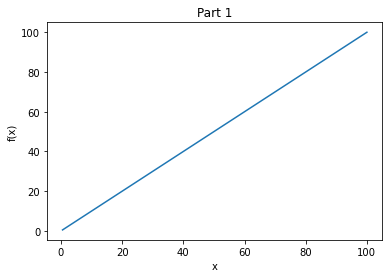

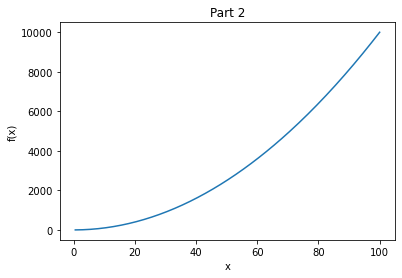

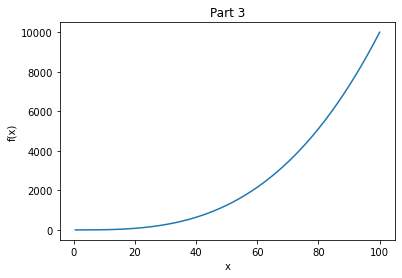

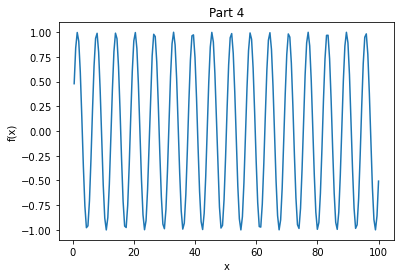

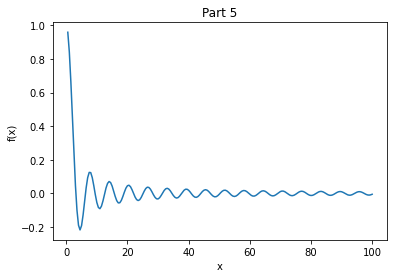

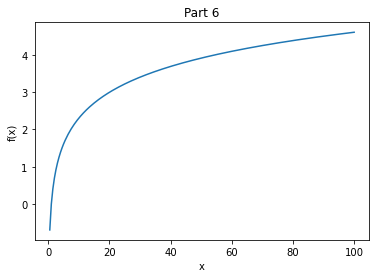

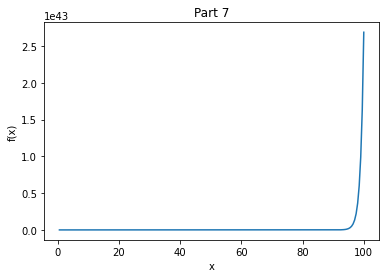

In [62]:
import numpy as np
from matplotlib import pyplot as plt
x = np.arange(0.5, 100.5 ,0.5)
def f1(x):
   return x
fig1 = plt.figure()
plt.plot(x, f(x))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Part 1")
plt.show()

def f2(x):
   return x*x
fig1 = plt.figure()
plt.plot(x, f2(x))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Part 2")
plt.show()

def f3(x):
   return (x*x*x/100)
fig1 = plt.figure()
plt.plot(x, f3(x))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Part 3")
plt.show()

def f4(x):
   return np.sin(x)
fig1 = plt.figure()
plt.plot(x, f4(x))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Part 4")
plt.show()

def f5(x):
   return np.sin(x)/x
fig1 = plt.figure()
plt.plot(x, f5(x))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Part 5")
plt.show()

def f6(x):
   return np.log(x)
fig1 = plt.figure()
plt.plot(x, f6(x))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Part 6")
plt.show()

def f7(x):
   return np.exp(x)
fig1 = plt.figure()
plt.plot(x, f7(x))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Part 7")
plt.show()



### Q10

In [220]:
import numpy as np
import pandas as pd
import statistics
arr=np.random.uniform(low=1, high=2, size=(20,5))

df=pd.DataFrame(arr, columns=["a","b","c","d","e"])
maxx=0
ans1=""
for x in ["a","b","c","d","e"]:
    temp=statistics.stdev(df[x])
    if(temp>maxx):
        maxx=temp
        ans1=x
print("Column with maximum standard deviation: ", ans1," (", maxx,")")
summ=11
ans2=[]
for x in arr:
    if (sum(x)/5<summ):
        summ=sum(x)/5
        ans2=x
print("Row with minimum mean: ",x)

df

Column with maximum standard deviation:  b  ( 0.3185565158545525 )
Row with minimum mean:  [1.20708235 1.7106176  1.73744398 1.75013805 1.54301115]


,a,b,c,d,e
0,1.125757,1.695585,1.344619,1.722168,1.305477
1,1.554739,1.149615,1.822480,1.255910,1.342685
2,1.894229,1.407249,1.069381,1.578441,1.503957
3,1.251864,1.712985,1.002390,1.822102,1.298196
4,1.249918,1.156435,1.566887,1.681884,1.925082
5,1.891697,1.543855,1.141639,1.592909,1.371988
6,1.210919,1.961481,1.644086,1.697938,1.095739
7,1.597658,1.286508,1.419738,1.022956,1.999944
8,1.467578,1.041876,1.402502,1.226832,1.769051
9,1.698086,1.015092,1.598635,1.005376,1.896126


### Q11

In [115]:
import numpy as np
import pandas as pd
import statistics
arr=np.random.uniform(low=1, high=2, size=(20,5))

df=pd.DataFrame(arr, columns=["a","b","c","d","e"])
df["f"]=df["a"]+df["b"]+df["c"]+df["d"]+df["e"]
df["g"]=["LT8" if x<8 else "GT8" for x in df["f"]]
ans1=0
for x in df["g"]:
    if(x=="LT8"):
        ans1+=1
print("Number of rows in the dataframe where the value in the column g is LT8: ", ans1)
lt8=[]
gt8=[]
for x in range(20):
    if (df["g"][x]=="GT8"):
        gt8.append(df["f"][x])
    else:
        lt8.append(df["f"][x])
print("Standard Deviation LT8: ", statistics.stdev(lt8))
print("Standard Deviation GT8: ", statistics.stdev(gt8))
df


Number of rows in the dataframe where the value in the column g is LT8:  15
Standard Deviation LT8:  0.5456301508190108
Standard Deviation GT8:  0.24334839332195038


,a,b,c,d,e,f,g
0,1.035518,1.431512,1.319998,1.132814,1.919080,6.838921,LT8
1,1.295964,1.173245,1.289309,1.410909,1.614596,6.784023,LT8
2,1.692399,1.729567,1.468258,1.784352,1.822891,8.497468,GT8
3,1.177513,1.770754,1.777704,1.376576,1.341450,7.443998,LT8
4,1.243653,1.334885,1.014051,1.680131,1.518588,6.791308,LT8
5,1.768354,1.150739,1.220773,1.100309,1.314356,6.554531,LT8
6,1.723773,1.751769,1.667192,1.047360,1.096375,7.286469,LT8
7,1.000002,1.805326,1.121508,1.157290,1.237461,6.321589,LT8
8,1.438517,1.898921,1.156490,1.737594,1.582165,7.813688,LT8
9,1.515154,1.626128,1.496532,1.622591,1.701705,7.962109,LT8


### Q12

Broadcasting is numpy allows to do arthemetic operations on array which may not be of similar size. However the two arrays need to be compatible with each other. There are some rules which needs to be followed to ensure compatibility. The dimensions of the array should be compatible considering the following rules. If arrays have different dimensions say (2,3,4,5) and (4,5), then we can add ones in the beginning of the smaller dimension i.e. conisder (1,1,4,5). Once the sizes are same we need to compare the numbers in order, "1" matches with any number. If the number is not "1" we need to ensure that the numbers are equal. If there is a mismatch, the arrays are not compatible and vice versa. In the above example 1 matches with 2, 1 matches with 3(as 1 matches with all numbers), 4 matches with 4, and 5 matches with 5. Therefore, they are compatible. 

Note: (2,3,4,5) and (5,4) would have been incompatible, as 4 does not match with 5, and 5 does not match with 4. We can not change the order of dimensions.

In [125]:
import numpy as np
#arrays with same size  
#(4)&(4)
a = np.array([1,2,3,4]) 
b = np.array([10,20,30,40]) 
print(a+b)

#arrays with different size 
#(2,4)&(4)   
a = np.array([[1,2,3,4],[5,6,7,8]]) 
b = np.array([10,20,30,40]) 
print("\n",a+b)

#arrays with different size
#(2,4)&(2,1)
a = np.array([[1,2,3,4],[5,6,7,8]]) 
b = np.array([[10],[20]]) 
print("\n",a+b)

[11 22 33 44]

 [[11 22 33 44]
 [15 26 37 48]]

 [[11 12 13 14]
 [25 26 27 28]]


### Q13

In [164]:
import numpy as np
arr=np.random.randint(low=1, high=10, size=(5,5,5))

def am(arr):
    l=arr.reshape(arr.size)#flatning the array to 1D
    minn=10000000
    ans=0
    for i in range(len(l)):
        if (l[i]<minn):
            minn=l[i]
            ans=i
    return ans

print("Minimum element using function: ", am(arr))
print("Minimum element using argmin: ", np.argmin(arr))

Minimum element using function:  4
Minimum element using argmin:  4
